# EXO1


In [14]:
library("ggplot2")
library("ggforce")

In [2]:
# Create the data
data = data.frame(math=c(1,2,3,4,5,6,7,8,9,10,11),
                  musique=c(6,1,4,5,3,2,9,7,8,10,11),
                  francais=c(2,6,1,3,4,5,8,9,7,10,11))


In [3]:
# Show data
data

math,musique,francais
<dbl>,<dbl>,<dbl>
1,6,2
2,1,6
3,4,1
4,5,3
5,3,4
6,2,5
7,9,8
8,7,9
9,8,7


On centre les données

In [4]:
data=scale(data,center=TRUE,scale=FALSE)

In [5]:
cov(data)

,math,musique,francais
math,11.0,8.3,9.5
musique,8.3,11.0,7.5
francais,9.5,7.5,11.0


**Attention**  : En R, on obtient avec la fonction cov, la variance corrigée soit 
$\frac{n}{n-1}cov$


In [6]:
vraicov = (10/11)* cov(data)
round(vraicov,2)

,math,musique,francais
math,10.00,7.55,8.64
musique,7.55,10.00,6.82
francais,8.64,6.82,10.00


# Notations et calcul

$Y$ Données centrées

$V=Y^TPY$ Matrice de variance-covariance

$M_{IV}$ Métrique inverse des variance

$$
M_{IV}=
\begin{pmatrix}
1/\sigma^2_{math} & 0 & 0 \\
0 & 1/\sigma^2_{musique} & 0 \\
0 & 0 &1/\sigma^2_{français}
\end{pmatrix}
$$

$$
M^{1/2}_{IV}=
\begin{pmatrix}
1/\sigma_{math} & 0 & 0 \\
0 & 1/\sigma_{musique} & 0 \\
0 & 0 &1/\sigma_{français}
\end{pmatrix}
$$

$M^{1/2}_{IV}VM^{1/2}_{IV}$ Matrice de corrélation


# ACP normée

- Pondération P

## Point de vue métrique inverse des variances

- Données : $Y$
- Métrique : $M_{IV}$
- Matrice d'inertie : $Y^TPYM_{IV}$

$$
=
\begin{pmatrix}
\sigma^2_{math}/\sigma^2_{math} & cov(math,musique)/\sigma^2_{musique}& cov(math,français)/\sigma^2_{français} \\
cov(math,musique)/\sigma^2_{math} & \sigma^2_{musique}/\sigma^2_{musique}& cov(musique,français)/\sigma^2_{français} \\
cov(math,francais)//\sigma^2_{math} & cov(musique,français)/\sigma^2_{musique}& \sigma^2_{francais}/\sigma^2_{français} \\
\end{pmatrix}
$$
- Distances : $y_i^TM_{IV}y_i$
$$
= \frac{1}{\sigma^2_{math}} y_{i,math}^2 + \frac{1}{\sigma^2_{musique}} y_{i,musique}^2 + \frac{1}{\sigma^2_{français}} y_{i,français}^2 
$$

## Point de vue utilisation des données réduites

- Données : $Z=YM_{IV}^{1/2}$
- Métrique : $I_3$
- Matrice d'inertie : $Z^TPZI_3 = M_{IV}^{1/2}Y^TPYM_{IV}^{1/2}$ : matrice de corrélation

$$
=
\begin{pmatrix}
\sigma^2_{math}/\sigma^2_{math} & \frac{cov(math,musique)}{\sigma_{math}\sigma_{musique}} & \frac{cov(math,français)}{\sigma_{math}\sigma_{français}} \\
\frac{cov(math,musique)}{\sigma_{math}\sigma_{musique}} & \sigma^2_{musique}/\sigma^2_{musique}& \frac{cov(musique,français)}{\sigma_{musique}\sigma_{français}} \\
\frac{cov(math,français)}{\sigma_{math}\sigma_{français}} & \frac{cov(musique,français)}{\sigma_{musique}\sigma_{français}}& \sigma^2_{francais}/\sigma^2_{français} \\
\end{pmatrix}
$$

- Distances : $z_i^TI_3z_i = (M^{1/2}_{IV}y_i)^T(M^{1/2}_{IV}y_i)=y_i^TM_{IV}y_i$
$$
= \left(\frac{1}{\sigma_{math}} y_{i,math}\right)^2 + \left(\frac{1}{\sigma_{musique}} y_{i,musique}\right)^2 + \left(\frac{1}{\sigma_{français}} y_{i,français}\right)^2 
$$

## Synthèse

Même calcul de distances vis à vis des points initaux (non réduits) $\implies$ Mêmes axes principaux $\implies$ Mêmes vecteurs propres


# Diagonalisation

In [7]:
# Transformation en matrice
datam=as.matrix(data)

# Matrice d'inertie
1/11*(t(datam))%*%datam
diagonalisation=eigen(1/11*(t(datam))%*%datam)
diagonalisation

,math,musique,francais
math,10.000000,7.545455,8.636364
musique,7.545455,10.000000,6.818182
francais,8.636364,6.818182,10.000000


eigen() decomposition
$values
[1] 25.358010  3.373095  1.268896

$vectors
           [,1]       [,2]       [,3]
[1,] -0.5979918  0.2357798  0.7660376
[2,] -0.5518483 -0.8142494 -0.1801702
[3,] -0.5812652  0.5304769 -0.6170292


Calcul des coordonnées des deux premiers individus

In [8]:
datam[1,]%*%diagonalisation$vectors
datam[2,]%*%diagonalisation$vectors

5.31502,-3.300807,-1.362071


5.151209,3.128128,-2.163299


Calcul des coordonnées des variables

In [11]:
coordmath = sqrt(diagonalisation$values)*diagonalisation$vectors[1,]
coordmusique = sqrt(diagonalisation$values)*diagonalisation$vectors[2,]
coordfrancais = sqrt(diagonalisation$values)*diagonalisation$vectors[3,]

variables=rbind(coordmath,coordmusique,coordfrancais)
variables

coordmath,-3.011292,0.4330329,0.8629051
coordmusique,-2.778928,-1.4954494,-0.2029532
coordfrancais,-2.927062,0.9742731,-0.6950542


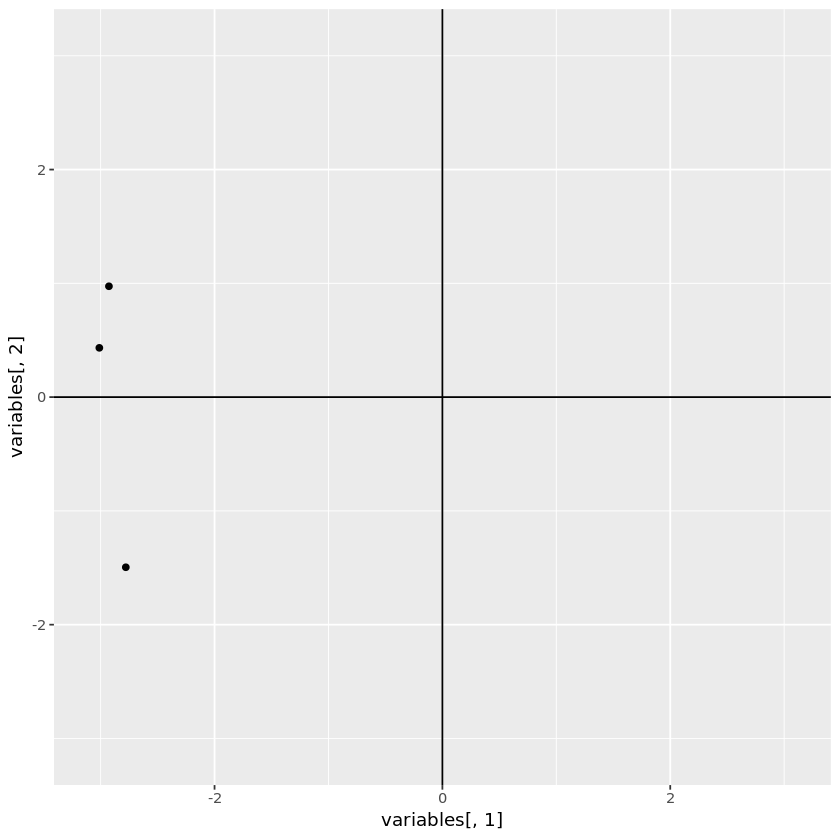

In [12]:
qplot(variables[,1],variables[,2],xlim=c(-3.1,3.1),ylim=c(-3.1,3.1)) + geom_hline(yintercept=0) + geom_vline(xintercept=0)

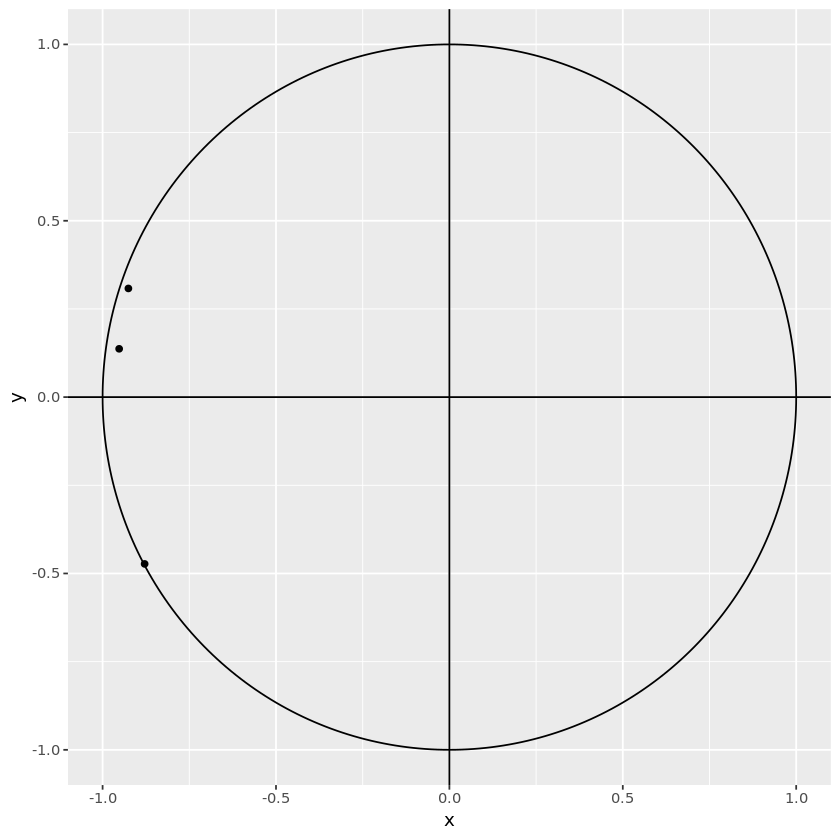

In [15]:
variablesreduites=variables/sqrt(10)
plan12=data.frame(x=variablesreduites[,1],y=variablesreduites[,2])

ggplot() +
xlim(-1,1) + ylim(-1,1) +
geom_hline(yintercept=0) + geom_vline(xintercept=0) +
geom_point(aes(x = x, y = y),plan12) +
geom_circle(aes(x0 = x0, y0 = y0, r = r), data = data.frame(x0 = 0,y0 = 0,r = 1)) 